# N-Queens Problem

### Definitions and functions

In [1]:
# Imports
import random
import math
import matplotlib.pyplot as plt
import copy

In [2]:
# Function to create an Empty Board
def emptyChessBoard():
    return [0] * chessBoardSize * chessBoardSize

In [3]:
# Function to create a Random Chess Board
def randomChessBoard():
    randChessBoard = emptyChessBoard()
    for x in range(random.randrange(maxRandomQueens)):
        randChessBoard[random.randrange(chessBoardSize*chessBoardSize)] = 1
    return randChessBoard

In [4]:
# Function to create a Full Random Chess Board
def fullRandomChessBoard():
    randChessBoard = emptyChessBoard()
    for x in range(chessBoardSize):
        while True:
            randPosition = random.randrange(chessBoardSize*chessBoardSize)
            if randChessBoard[randPosition] == 0:
                randChessBoard[randPosition] = 1
                break            
    return randChessBoard

In [5]:
# Function to create a Valid Random Chess Board
def validRandomChessBoard():
    while True:
        randChessBoard = randomChessBoard()
        if isConstraintSatisfactory(randChessBoard):
            return randChessBoard

In [6]:
# Function to print the Board
def printChessBoard(chessBoard):
    boardSize = int(math.sqrt(len(chessBoard)))
    boardElement = 0
    for x in chessBoard:
        printBoard = lambda i: '|_|' if str(i) == '0' else '|X|'
        boardElement += 1
        if boardElement % boardSize == 0:
            print("%s" %(printBoard(x)))
        else:
            print("%s" %(printBoard(x)), end = '')

In [7]:
# Function to check constraints
def isConstraintSatisfactory(chessBoard):
    for myIndex, myValue in enumerate(chessBoard):
        if myValue == 1: # Queen found
            for myPairIndex, myPairValue in enumerate(chessBoard):
                if myPairValue == 1 and myPairIndex != myIndex: # Queen check
                    #print('Debug: Check ' + str(myIndex) + ' vs ' + str(myPairIndex))
                    if isConstraintSatisfactoryLocal(chessBoard, myIndex, myPairIndex) is False:
                        return False
    return True   

In [8]:
# Count constraints violations
def countConstraintSatisfactory(chessBoard):
    violations = 0
    for myIndex, myValue in enumerate(chessBoard):
        if myValue == 1: # Queen found
            for myPairIndex, myPairValue in enumerate(chessBoard):
                if myPairValue == 1 and myPairIndex != myIndex: # Queen check
                    #print('Debug: Check ' + str(myIndex) + ' vs ' + str(myPairIndex))
                    if isConstraintSatisfactoryLocal(chessBoard, myIndex, myPairIndex) is False:
                        violations = violations + 1
    if violations > 0:
        violations = violations / 2
    return violations

In [9]:
# Function to check constraints between x and y
def isConstraintSatisfactoryLocal(chessBoard, x, y):
    boardSize = int(math.sqrt(len(chessBoard)))
    xRow = int (x/boardSize)
    xColumn = int (x%boardSize)
    yRow = int (y/boardSize)
    yColumn = int (y%boardSize)
    #print('Debug: Check ' + str(x) + ' ('+str(xRow)+','+str(xColumn)+')  vs ' + str(y) + ' ('+str(yRow)+','+str(yColumn)+')')
    if xRow == yRow:
        return False
    if xColumn == yColumn:
        return False
    inBoard = lambda e: boardSize if e > boardSize else 0 if e < 0 else e
    
    for colisionNumber in list(range(-1*boardSize,boardSize)):
        if xRow == yRow + colisionNumber and xColumn == yColumn + colisionNumber:
            #print('Debug: Colided!')
            return False
        if xRow == yRow - colisionNumber and xColumn == yColumn + colisionNumber:
            #print('Debug: Colided!')
            return False
    
    return True    

In [10]:
# Function that returns the fitness of a chessboard based on the number of queens
def fitnessQueens(chessBoard):
    if isConstraintSatisfactory(chessBoard):
        return chessBoard.count(1)
    else:
        return 0

In [11]:
# Function that returns the fitness of a chessboard based on the number of violations
def fitness(chessBoard):
    return countConstraintSatisfactory(chessBoard)

In [12]:
# Sort population
def sortPopulation(population):
    population.sort(key=lambda x: fitness(x))
    return population

In [13]:
# Tournament selection
def tournament(population, k):
    candidate1 = copy.deepcopy(population[random.randrange(len(population))])
    for i in range(k):
        while True:
            candidate2 = copy.deepcopy(population[random.randrange(len(population))])
            if candidate1 != candidate2:
                break
    if fitness(candidate2) < fitness(candidate1):
        return candidate2
    else:
        return candidate1

In [14]:
# Crossover
def crossover(parent1, parent2):
    cut1 = random.randrange(len(parent1))
    cut2 = random.randrange(len(parent1))
    if cut1 == cut2:
        return parent1, parent2
    if cut1 > cut2:
        cuttmp = cut1
        cut1 = cut2
        cut2 = cuttmp
    #print('%i - %i' %(cut1, cut2))
    child1 = parent1[0:cut1]+parent2[cut1:cut2]+parent1[cut2:]
    child2 = parent2[0:cut1]+parent1[cut1:cut2]+parent2[cut2:]
    return child1, child2

In [15]:
# Mutation flip position
def mutateFlipPosition(individual):
    flipsCount = random.randrange(maxNumberOfRandFlips)
    if flipsCount == 0:
        flipsCount = 1
    for flips in range(flipsCount):
        while True:
            randFlip = random.randrange(len(individual))
            if individual[randFlip] == 0:
                individual[randFlip] = 1
                break
        while True:
            randFlip = random.randrange(len(individual))
            if individual[randFlip] == 1:
                individual[randFlip] = 0
                break

In [16]:
# Fix chess board queens count
def fixChessBoard(individual):
    while individual.count(1) > chessBoardSize:
        randFlip = random.randrange(len(individual))
        if individual[randFlip] == 1:
            individual[randFlip] = 0

    while individual.count(1) < chessBoardSize:
        randFlip = random.randrange(len(individual))
        if individual[randFlip] == 0:
            individual[randFlip] = 1

In [17]:
# Definitions
chessBoardSize = 8 # Board size
maxRandomQueens = 8 # Just for random gereration, does not limit the algorithm
halfPopulationSize = 50 # Half population of a generation
tournamentRounds = 1 # Rounds of tournament selection
chanceToMutate = 0.9 # Probability to mutate
maxNumberOfRandFlips = 2 # How many positions can be fliped
generations = 500 # How many generations

### Main program

In [21]:
# Generate initial random population
# Phenotype representation as a List
population = []
for individual in list(range(halfPopulationSize)):
    randChessBoard = fullRandomChessBoard()
    population.append(randChessBoard)

In [22]:
# Main generations loop
genFitnessLog = []
random.seed()

for gen in range(generations):

    # Next generation
    newPopulation = []
    
    # Crossover population until it reaches full size
    while len(newPopulation) < halfPopulationSize * 2:
        parent1 = tournament(population, tournamentRounds)
        parent2 = tournament(population, tournamentRounds)
        child1, child2 = crossover(parent1, parent2)
        fixChessBoard(child1)
        fixChessBoard(child2)
        newPopulation.append(child1)
        newPopulation.append(child2)
        newPopulation.append(parent1)
        newPopulation.append(parent2)

    # Mutate some individuals (not the first)
    for i in range(len(newPopulation)):
        if random.random() <= chanceToMutate:
            mutateFlipPosition(newPopulation[i])

    # Complete with random individuals
    #while len(population) < halfPopulationSize * 2:
    #    randChessBoard = fullRandomChessBoard()
    #    population.append(randChessBoard)
        
    # Sort population according to fitness
    newPopulation = sortPopulation(newPopulation)
    
    # Print generation fitness
    genFitness = fitness(newPopulation[0])
    genFitnessLog.append(fitness(newPopulation[0]))
    #print('Gen %i fitness 0=%i size %i' %(gen, genFitness, len(newPopulation)))
    
    # Next generation
    population = []
    
    for i in range(halfPopulationSize):
        population.append(newPopulation[i])

    if genFitness == 0:
        break
        

### Results

Found a chessboard with fitness 0 (With 0 Constraint Violations). It runned for 34 generations.
---
|_||_||_||_||_||_||X||_|
|_||_||X||_||_||_||_||_|
|X||_||_||_||_||_||_||_|
|_||_||_||_||_||X||_||_|
|_||_||_||_||_||_||_||X|
|_||_||_||_||X||_||_||_|
|_||X||_||_||_||_||_||_|
|_||_||_||X||_||_||_||_|
---


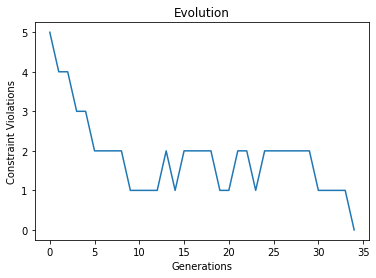

In [23]:
# Show results
print('Found a chessboard with fitness %i (With %i Constraint Violations). It runned for %i generations.' %(fitness(population[0]), fitness(population[0]), len(genFitnessLog)-1))
print('---')
printChessBoard(population[0])
print('---')

# Plot evolution
plt.plot(genFitnessLog)
plt.title('Evolution')
plt.ylabel('Constraint Violations')
plt.xlabel('Generations')

plt.show()

Comments

The algorithm is an implementation of a mono-objective genetic algorithm and is explained through the comments I put along the code.

Initially I tried a strategy of starting with an empty board and inserting queens randomly as long as it didn't violate any constraints. This way, the population had only valid individuals and the fitness function to be maximized was the number of queens on the board. With this strategy, I found that the algorithm quickly reached a situation with 7 queens on the board but struggled to evolve to a board with 8 queens. After experimenting with the parameters of this strategy, I noticed that numerous individuals (1000) were needed for the algorithm to converge to 8 queens.

So, I changed the strategy so that all individuals in the generation had 8 queens and the fitness function to be minimized became the number of collisions between the queens. In this new strategy, the algorithm behaved more efficiently, finding a valid position with 8 queens faster. * As the delivered version is changed, it has some functions that are no longer used, but are illustrative to demonstrate the evolution of the adopted strategy.

With the exercise, it became clear that the strategy used to generate individuals and calculate fitness influences the convergence capacity of the genetic algorithm, and a strategy may have better results depending on each problem addressed.